# Import Librarys

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read CSV data

In [28]:
df = pd.read_csv("matches.csv")

In [29]:
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [30]:
df.isnull().sum()

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [31]:
df['umpire2'] = df['umpire2'].fillna('Unknown')
df['umpire1'] = df['umpire1'].fillna('Unknown')

df['city'] = df['city'].fillna(df['city'].mode()[0])
df['winner'] = df['winner'].fillna(df['winner'].mode()[0])

df.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            0
umpire2            0
dtype: int64

In [34]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,8/4/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Unknown,Unknown


In [35]:
df.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
751,752,IPL-2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,753,IPL-2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,754,IPL-2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,Unknown,Unknown
754,755,IPL-2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford
755,756,IPL-2019,Hyderabad,12/5/2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould


In [32]:
print(df.dtypes)

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   winner           756 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
 14  umpire1          756 non-null    object
 15  umpire2          756 non-null    object
dtypes: int64(3), object(13)
memory usage: 94.6+ KB


In [8]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,8/4/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Unknown,Unknown


In [9]:
df.duplicated().sum()
df = df.drop_duplicates()
df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,8/4/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,752,IPL-2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,753,IPL-2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,754,IPL-2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,Unknown,Unknown
754,755,IPL-2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [10]:
df.describe()

,id,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000
mean,378.500000,13.283069,3.350529
std,218.382692,23.471144,3.387963
min,1.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000
50%,378.500000,0.000000,4.000000
75%,567.250000,19.000000,6.000000
max,756.000000,146.000000,10.000000


In [11]:
df.shape

(756, 16)

In [40]:
#Finding the number of seasons
df['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [42]:
#Finding which IPL team scored the maximum runs
df.iloc[df['win_by_runs'].idxmax()]

id                               44
Season                     IPL-2017
city                          Delhi
date                       6/5/2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

In [43]:
#Finding which team won by scoring maximum wickets
df.iloc[df['win_by_wickets'].idxmax()]

id                                                      3
Season                                           IPL-2017
city                                               Rajkot
date                                             7/4/2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype: object

# Univariant

### Q1.Which season had the most matches?

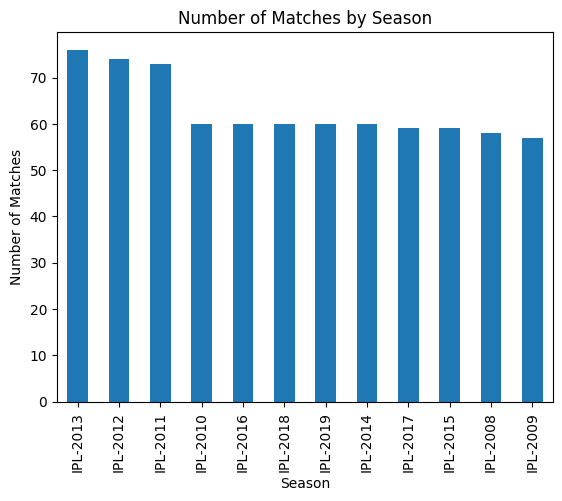

In [12]:
season_counts = df['Season'].value_counts()
season_counts.plot(kind='bar')
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.title("Number of Matches by Season")
plt.savefig("1.png",  bbox_inches="tight", dpi = 300, transparent=True)
plt.show()

### Q2. Which city hosted the most matches?

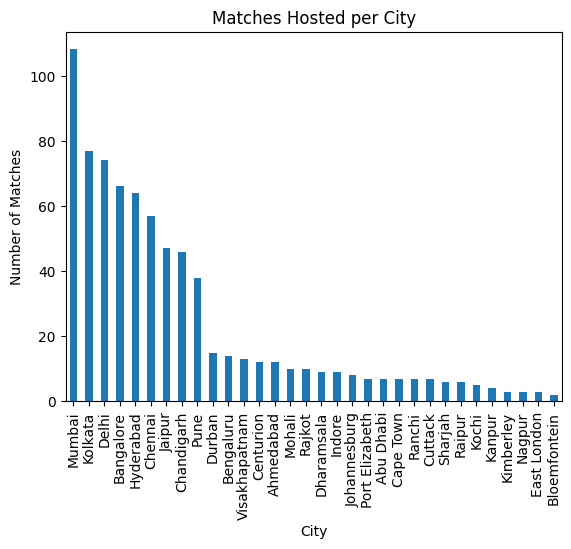

In [13]:
city_counts = df['city'].value_counts()
city_counts.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.title('Matches Hosted per City')
plt.savefig("1.png",  bbox_inches="tight", dpi = 300, transparent=True)
plt.show()

### Q3. Which team appears most frequently as Team1?

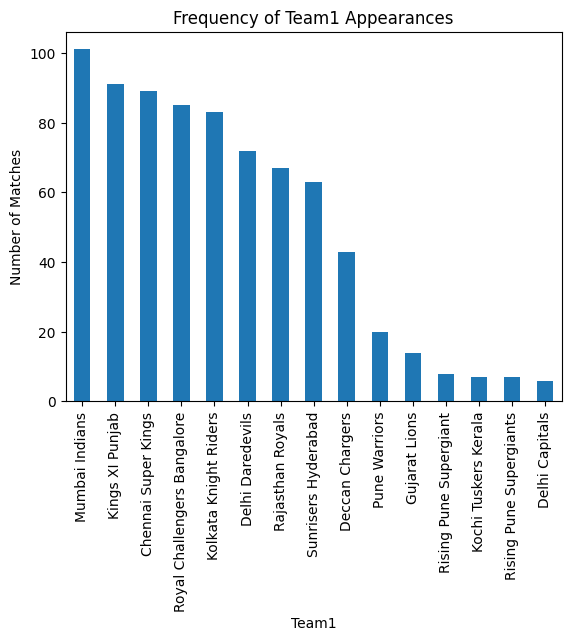

In [14]:
team1_counts = df['team1'].value_counts()
team1_counts.plot(kind='bar')
plt.xlabel('Team1')
plt.ylabel('Number of Matches')
plt.title('Frequency of Team1 Appearances')
plt.savefig("1.png",  bbox_inches="tight", dpi = 300, transparent=True)
plt.show()

### Q4. Which team appears most frequently as Team2?

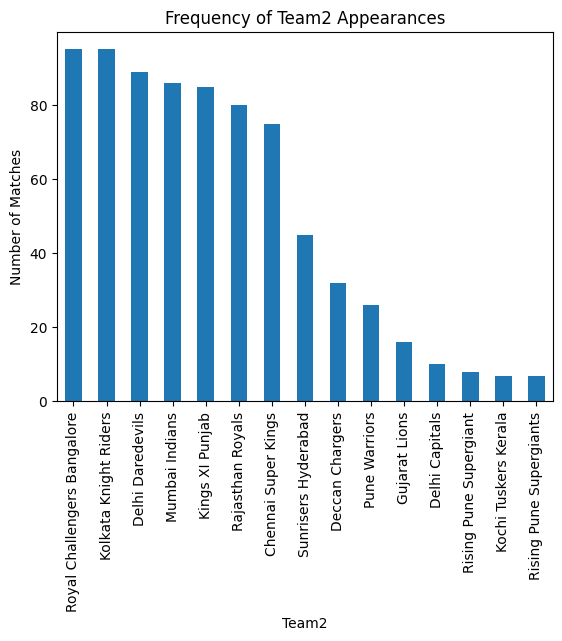

In [15]:
team2_counts = df['team2'].value_counts()
team2_counts.plot(kind='bar')
plt.xlabel('Team2')
plt.ylabel('Number of Matches')
plt.title('Frequency of Team2 Appearances')
plt.savefig("1.png",  bbox_inches="tight", dpi = 300, transparent=True)
plt.show()


### Q5. Which team won the toss most often?

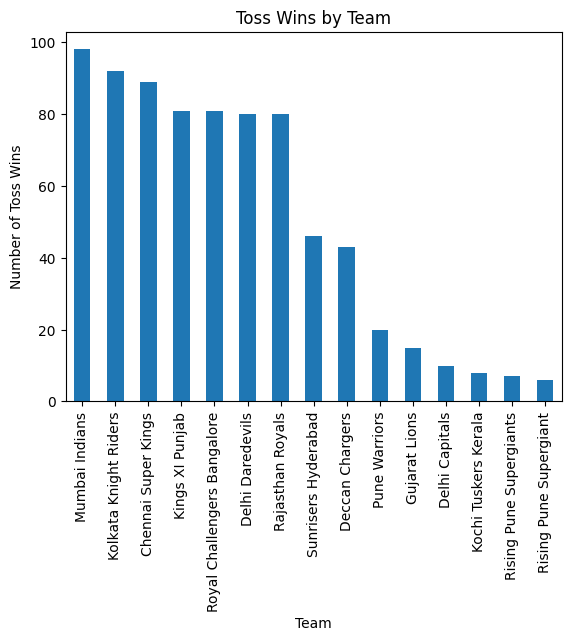

In [16]:
toss_winner_counts = df['toss_winner'].value_counts()
toss_winner_counts.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Number of Toss Wins')
plt.title('Toss Wins by Team')
plt.savefig("1.png",  bbox_inches="tight", dpi = 300, transparent=True)
plt.show()


### Q6. Which toss decision was chosen most often (bat/field)

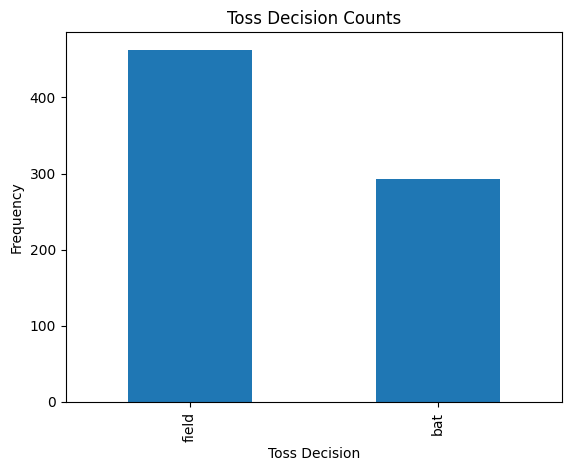

In [17]:
toss_decision_counts = df['toss_decision'].value_counts()
toss_decision_counts.plot(kind='bar')
plt.xlabel('Toss Decision')
plt.ylabel('Frequency')
plt.title('Toss Decision Counts')
plt.savefig("1.png",  bbox_inches="tight", dpi = 300, transparent=True)
plt.show()


### Q7. Which result type occurred most frequently (normal/tie/no result)

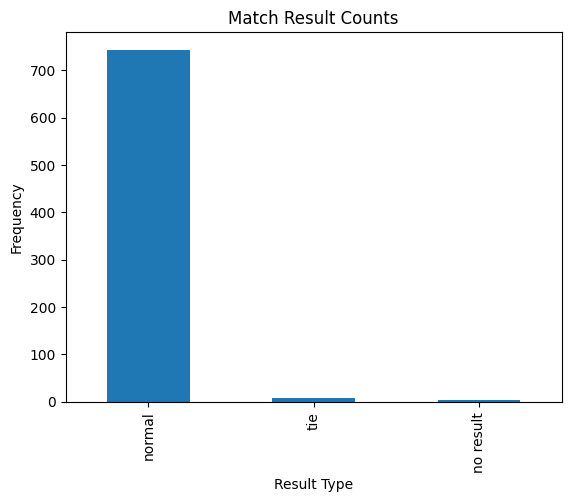

In [18]:
result_counts = df['result'].value_counts()
result_counts.plot(kind='bar')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.title('Match Result Counts')
plt.savefig("1.png",  bbox_inches="tight", dpi = 300, transparent=True)
plt.show()


### Q8. Which team won most matches?

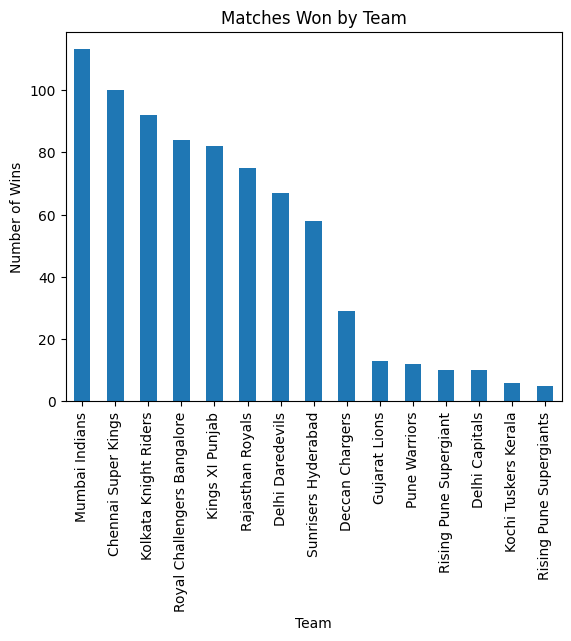

In [19]:
winner_counts = df['winner'].value_counts()
winner_counts.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Matches Won by Team')
plt.savefig("1.png",  bbox_inches="tight", dpi = 300, transparent=True)
plt.show()


### Q9. Which stadium hosted the most matches?

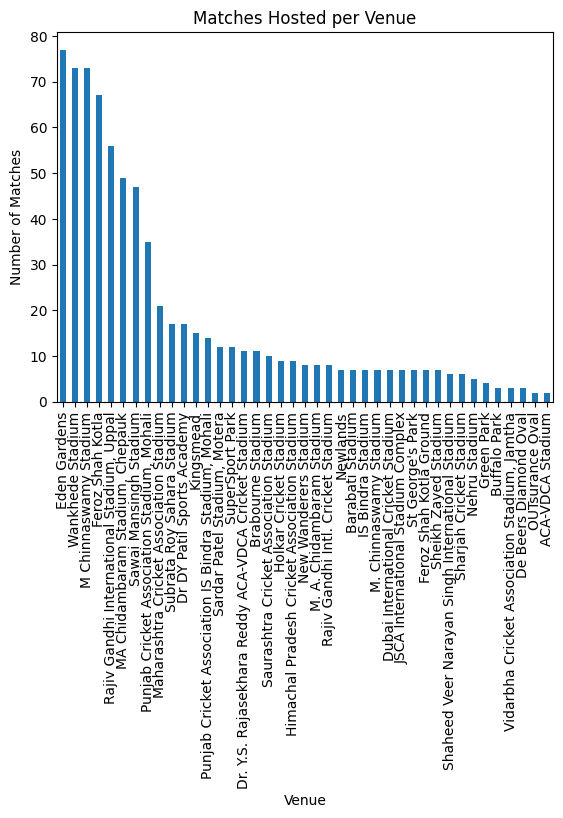

In [20]:
venue_counts = df['venue'].value_counts()
venue_counts.plot(kind='bar')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.title('Matches Hosted per Venue')
plt.savefig("1.png",  bbox_inches="tight", dpi = 300, transparent=True)
plt.show()


### Q10. Distribution of win margins by runs

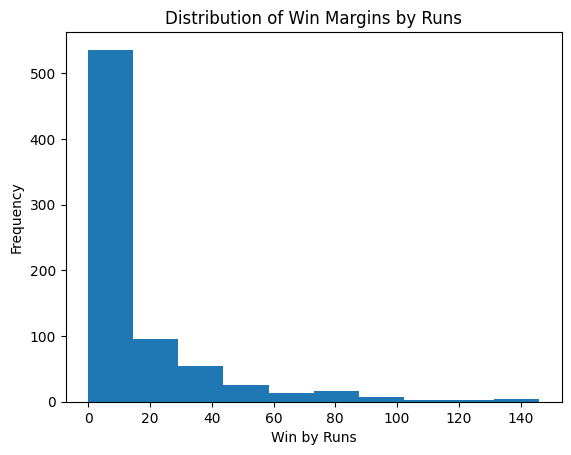

In [21]:
df['win_by_runs'].plot(kind='hist')
plt.xlabel('Win by Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Win Margins by Runs')
plt.savefig("1.png",  bbox_inches="tight", dpi = 300, transparent=True)
plt.show()


### Q11. Distribution of win margins by wickets

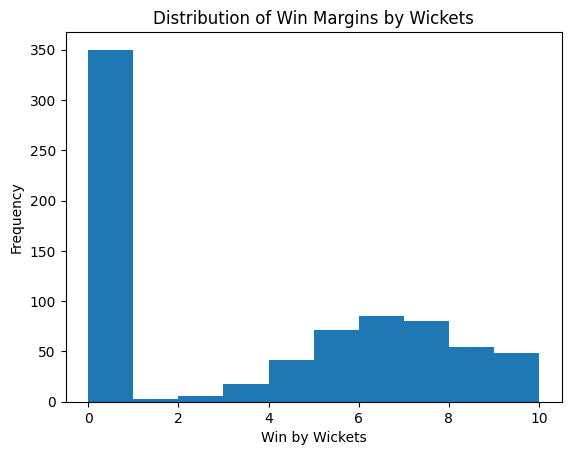

In [22]:
df['win_by_wickets'].plot(kind='hist')
plt.xlabel('Win by Wickets')
plt.ylabel('Frequency')
plt.title('Distribution of Win Margins by Wickets')
plt.savefig("1.png",  bbox_inches="tight", dpi = 300, transparent=True)
plt.show()


### Q12. Proportion of toss decisions

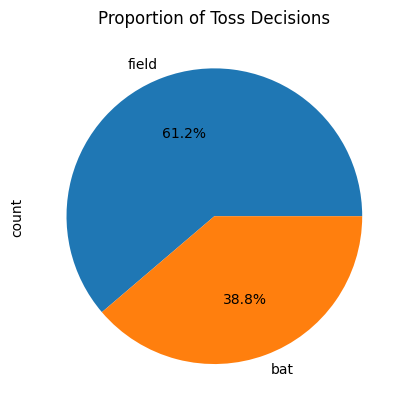

In [23]:
df['toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Toss Decisions')
plt.savefig("1.png",  bbox_inches="tight", dpi = 300, transparent=True)
plt.show()


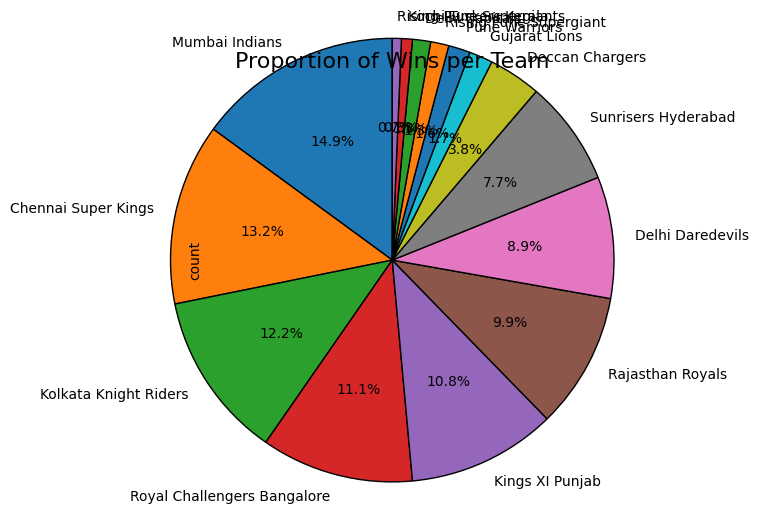

In [24]:
df['winner'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, radius=1.5, wedgeprops={'edgecolor':'black', 'linewidth':1})
plt.title('Proportion of Wins per Team', fontsize=16)
plt.savefig("1.png",  bbox_inches="tight", dpi = 300, transparent=True)
plt.show()


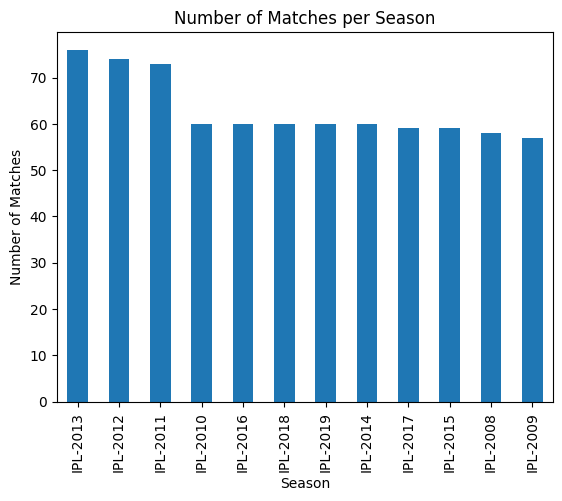

In [25]:
df['Season'].value_counts().plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Number of Matches per Season')
plt.savefig("1.png",  bbox_inches="tight", dpi = 300, transparent=True)
plt.show()
